# Import thư viện cần thiết

In [30]:
#bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')
#thư viện toán học cho hàm toán học
import math
#dùng để đọc dữ liệu
import pandas as pd
#giúp xử lý số liệu
import numpy as np
#dùng để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
#cài keras - thư viện mạng thần kinh for LSTM
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
#dùng để vẽ biểu đồ 
import matplotlib.pyplot as mtlplt
mtlplt.style.use("fivethirtyeight")
%matplotlib inline
from matplotlib import rcParams 
import tkinter
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)

In [31]:
AAPL = pd.read_csv("./Database/Pre_Processed_MSFT.csv")

# Lấy data từ file

In [32]:
file = './Database/Pre_Processed_MSFT.csv' #dữ liệu được tải về từ trang tradingview.com được niêm yết trên thị trường chứng khoán VN
df = pd.read_csv(file,parse_dates=True,index_col=0)
data = df.reset_index('Date') #đặt cột Date làm chỉ mục
data

,Date,Open,High,Low,Close,Adj. Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431597,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439156,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295315,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053057,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212034,51197400
...,...,...,...,...,...,...,...
2762,2020-12-22,222.690002,225.630005,221.850006,223.940002,217.680603,22612200
2763,2020-12-23,223.110001,223.559998,220.800003,221.020004,214.842255,18699600
2764,2020-12-24,221.419998,223.610001,221.199997,222.750000,216.523895,10550600
2765,2020-12-28,224.449997,226.029999,223.020004,224.960007,218.672104,17933500


# Lấy số lượng cột và hàng

In [33]:
df.shape

(2767, 6)

# Vẽ biểu đồ từ dữ liệu

<function matplotlib.pyplot.show(close=None, block=None)>

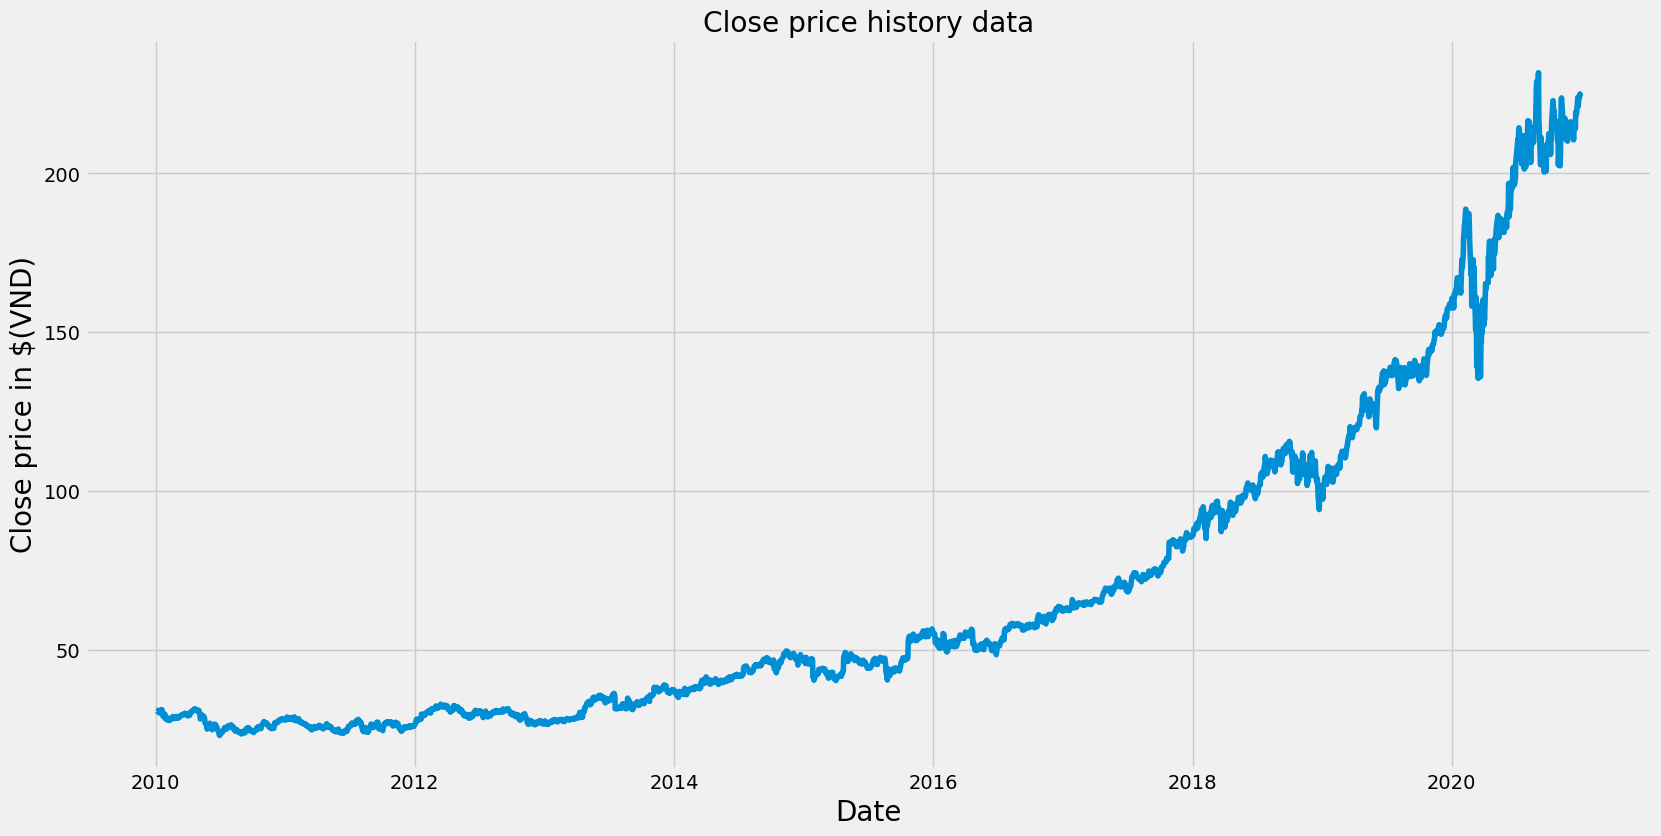

In [34]:
#Đây là biểu đồ giá đóng cửa của data từ khoảng thời gian 1/4/2016 đến 10/1/2022
mtlplt.figure(figsize=(18,9))
mtlplt.title('Close price history data')
mtlplt.plot(df['Close']) 
mtlplt.xlabel('Date', fontsize=20) #trục x biễu diễn cột Date
mtlplt.ylabel('Close price in $(VND)',fontsize=20) #trục y biểu diễn giá đóng trong ngày
mtlplt.show

# Tiền xử lý tập dữ liệu

In [35]:
#Tạo dataframe chỉ có cột giá đóng
stock_close_data = df.filter(['Close'])

#chuyển đổi dataframe đã tạo thành mảng numpy bằng hàm values
stock_close_dataset = stock_close_data.values

#chia dữ liệu thành tập train and test(train chiếm 80% data và test 20% còn lại của data)
trainingDataLength = math.ceil( len(stock_close_dataset) * 0.8 )

#hiển thị độ dài tập trai
trainingDataLength

2214

In [36]:
#Scale dữ liệu về dạng 0,1 giúp model train nhanh hơn. 
#Lstm hoạt động tốt hơn khi các giá trị đầu vào được chia tỷ lệ thành phạm vi tiêu chuẩn
scaler = MinMaxScaler(feature_range=(0,1))

#tiến hành scale dữ liệu bằng fit.trainsform
scaledData = scaler.fit_transform(stock_close_dataset)

#hiển thị giá trị dữ liệu được chia
scaledData.shape

(2767, 1)

In [37]:
#tạo tập dữ liệu mới chứa giá trị giá trị scale có kích thước từ 0 đến kích thươc dữ liệu 80% ở trên
StockTrainData = scaledData[0:trainingDataLength , :]

#tách dữ liệu thành 2 phần Xtrain và Ytrain
Xtrain = []
Ytrain = []
#tiến hành tạo dữ lieu cho xtrain và ytrain bằng vòng lặp trong phạm vi từ 60 đến tổng kích thước dữ liệu huấn luyện
#tạo dữ liệu với timestep=60 ngày, xem xét dữ liệu quá khứ để đoán ra ngày 61 
for i in range(60, len(StockTrainData)):
  Xtrain.append(StockTrainData[i-60:i, 0])
  Ytrain.append(StockTrainData[i, 0])
  if i<= 61:
    print(Xtrain)
    print(Ytrain)
    print()

[array([0.03805599, 0.03810391, 0.03719325, 0.03565951, 0.03666603,
       0.03479678, 0.03383819, 0.03518022, 0.03810391, 0.03762462,
       0.03877493, 0.03633052, 0.03355061, 0.02851802, 0.03024348,
       0.03110621, 0.03192101, 0.02947661, 0.02477953, 0.0258819 ,
       0.02612154, 0.02693635, 0.02314992, 0.02401266, 0.02257477,
       0.02396472, 0.02386886, 0.02449195, 0.02358129, 0.02559433,
       0.02674463, 0.02856595, 0.02760736, 0.02741564, 0.02549847,
       0.02693635, 0.02679256, 0.02712807, 0.0288056 , 0.02612154,
       0.02612154, 0.02693635, 0.02674463, 0.02693635, 0.02775115,
       0.02856595, 0.02957247, 0.03000384, 0.0300997 , 0.03048313,
       0.03172929, 0.03163344, 0.03153758, 0.03158551, 0.03292753,
       0.03182515, 0.03355061, 0.03187308, 0.03153758, 0.03240031])]
[0.030099697471870607]

[array([0.03805599, 0.03810391, 0.03719325, 0.03565951, 0.03666603,
       0.03479678, 0.03383819, 0.03518022, 0.03810391, 0.03762462,
       0.03877493, 0.03633052, 0.0

In [38]:
#chuyển đổi dữ liệu Xtrain, dữ liệu Ytrain thành mảng numpy 
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [39]:
#định hình lại dữ liệu Xtrain cho phù hợp với dữ liệu đầu vào thành dạng 3D và 1 đối tượng đại diện giá đóng cửa
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain.shape

(2154, 60, 1)

# Tạo model và xây dựng mô hình LSTM

In [40]:
#khởi tạo model
model = Sequential()

neurons = 50

#lớp LSTM đầu
model.add(LSTM(neurons, return_sequences=True, input_shape= (Xtrain.shape[1], 1))) 

#lớp LSTM thứ 2, không còn lớp nào cho lstm nên return_sequences= False
model.add(LSTM(neurons, return_sequences= False)) 

#thêm lớp nơron dày đặc
model.add(Dense(25)) 
model.add(Dense(1))

In [41]:
#biên dịch model
model.compile(optimizer='adam', loss='mse') 

In [42]:
#đào tạo với tập Xtrain, Ytrain đã cho
history_data = model.fit(Xtrain, Ytrain, batch_size=50, epochs=200, verbose=2) 

Epoch 1/200
44/44 - 5s - loss: 0.0030 - 5s/epoch - 117ms/step
Epoch 2/200
44/44 - 1s - loss: 7.0315e-05 - 1s/epoch - 27ms/step
Epoch 3/200
44/44 - 1s - loss: 4.8372e-05 - 1s/epoch - 25ms/step
Epoch 4/200
44/44 - 1s - loss: 4.7718e-05 - 1s/epoch - 25ms/step
Epoch 5/200
44/44 - 1s - loss: 5.5681e-05 - 1s/epoch - 25ms/step
Epoch 6/200
44/44 - 1s - loss: 4.6173e-05 - 1s/epoch - 25ms/step
Epoch 7/200
44/44 - 1s - loss: 4.6005e-05 - 1s/epoch - 26ms/step
Epoch 8/200
44/44 - 1s - loss: 4.7828e-05 - 1s/epoch - 25ms/step
Epoch 9/200
44/44 - 1s - loss: 4.5391e-05 - 1s/epoch - 25ms/step
Epoch 10/200
44/44 - 1s - loss: 4.5559e-05 - 1s/epoch - 25ms/step
Epoch 11/200
44/44 - 1s - loss: 4.6664e-05 - 1s/epoch - 25ms/step
Epoch 12/200
44/44 - 1s - loss: 4.9129e-05 - 1s/epoch - 25ms/step
Epoch 13/200
44/44 - 1s - loss: 4.4492e-05 - 1s/epoch - 26ms/step
Epoch 14/200
44/44 - 1s - loss: 4.5428e-05 - 1s/epoch - 25ms/step
Epoch 15/200
44/44 - 1s - loss: 4.2045e-05 - 1s/epoch - 25ms/step
Epoch 16/200
44/44 - 1

Epoch 125/200
44/44 - 1s - loss: 1.6266e-05 - 1s/epoch - 24ms/step
Epoch 126/200
44/44 - 1s - loss: 1.6128e-05 - 1s/epoch - 25ms/step
Epoch 127/200
44/44 - 1s - loss: 1.6937e-05 - 1s/epoch - 25ms/step
Epoch 128/200
44/44 - 1s - loss: 1.7519e-05 - 1s/epoch - 25ms/step
Epoch 129/200
44/44 - 1s - loss: 1.9621e-05 - 1s/epoch - 25ms/step
Epoch 130/200
44/44 - 1s - loss: 1.6342e-05 - 1s/epoch - 26ms/step
Epoch 131/200
44/44 - 1s - loss: 1.5858e-05 - 1s/epoch - 26ms/step
Epoch 132/200
44/44 - 1s - loss: 2.3776e-05 - 1s/epoch - 26ms/step
Epoch 133/200
44/44 - 1s - loss: 1.7672e-05 - 1s/epoch - 25ms/step
Epoch 134/200
44/44 - 1s - loss: 1.9793e-05 - 1s/epoch - 25ms/step
Epoch 135/200
44/44 - 1s - loss: 1.6405e-05 - 1s/epoch - 25ms/step
Epoch 136/200
44/44 - 1s - loss: 1.6168e-05 - 1s/epoch - 25ms/step
Epoch 137/200
44/44 - 1s - loss: 1.4935e-05 - 1s/epoch - 25ms/step
Epoch 138/200
44/44 - 1s - loss: 1.4429e-05 - 1s/epoch - 25ms/step
Epoch 139/200
44/44 - 1s - loss: 1.5920e-05 - 1s/epoch - 26ms/

# Xây dựng tập thử nghiệm test

In [20]:
#tạo tập dữ liệu test với timestep=60 ngày tương tự như tập train
testingData = scaledData[trainingDataLength - 60: , :]

#tạo tập Xtest và Ytest
Xtest = []
Ytest = stock_close_dataset[trainingDataLength:, :]
for i in range(60, len(testingData)):
  Xtest.append(testingData[i-60:i, 0])

In [21]:
#chuyển dữ liệu Xtest thành mảng numpy
Xtest = np.array(Xtest)
Xtest

array([[0.46814851, 0.47498779, 0.47401075, ..., 0.53375672, 0.53258427,
        0.53522228],
       [0.47498779, 0.47401075, 0.4691744 , ..., 0.53258427, 0.53522228,
        0.53561309],
       [0.47401075, 0.4691744 , 0.47435271, ..., 0.53522228, 0.53561309,
        0.54450415],
       ...,
       [0.84797264, 0.85461651, 0.84894968, ..., 0.9803615 , 0.94880313,
        0.94274548],
       [0.85461651, 0.84894968, 0.85940401, ..., 0.94880313, 0.94274548,
        0.94899853],
       [0.84894968, 0.85940401, 0.85530044, ..., 0.94274548, 0.94899853,
        0.92183683]])

In [22]:
#Reshape dữ liệu 
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1 ))

In [23]:
#Chuyển đổi về dạng giá thông thường mà ta đọc được 
predictions = model.predict(Xtest)
predictions = scaler.inverse_transform(predictions)
predictions

10/10 [==============================] - 0s 10ms/step


array([[150.44846],
       [150.59981],
       [152.22124],
       [151.89452],
       [151.59885],
       [152.0882 ],
       [153.50778],
       [154.71263],
       [155.60965],
       [154.84337],
       [154.54529],
       [155.83685],
       [157.49318],
       [157.54285],
       [157.50252],
       [158.71228],
       [159.0533 ],
       [157.84122],
       [157.98134],
       [160.7493 ],
       [159.00372],
       [159.32162],
       [158.07272],
       [160.40176],
       [162.31291],
       [161.5763 ],
       [163.28455],
       [162.25562],
       [163.23445],
       [166.06961],
       [166.94095],
       [166.34282],
       [165.64409],
       [166.71844],
       [165.29057],
       [162.84946],
       [165.93736],
       [168.41478],
       [172.69052],
       [170.05609],
       [173.85954],
       [179.21255],
       [178.76778],
       [182.29213],
       [182.50256],
       [187.25261],
       [183.09328],
       [183.86548],
       [183.26286],
       [185.17801],


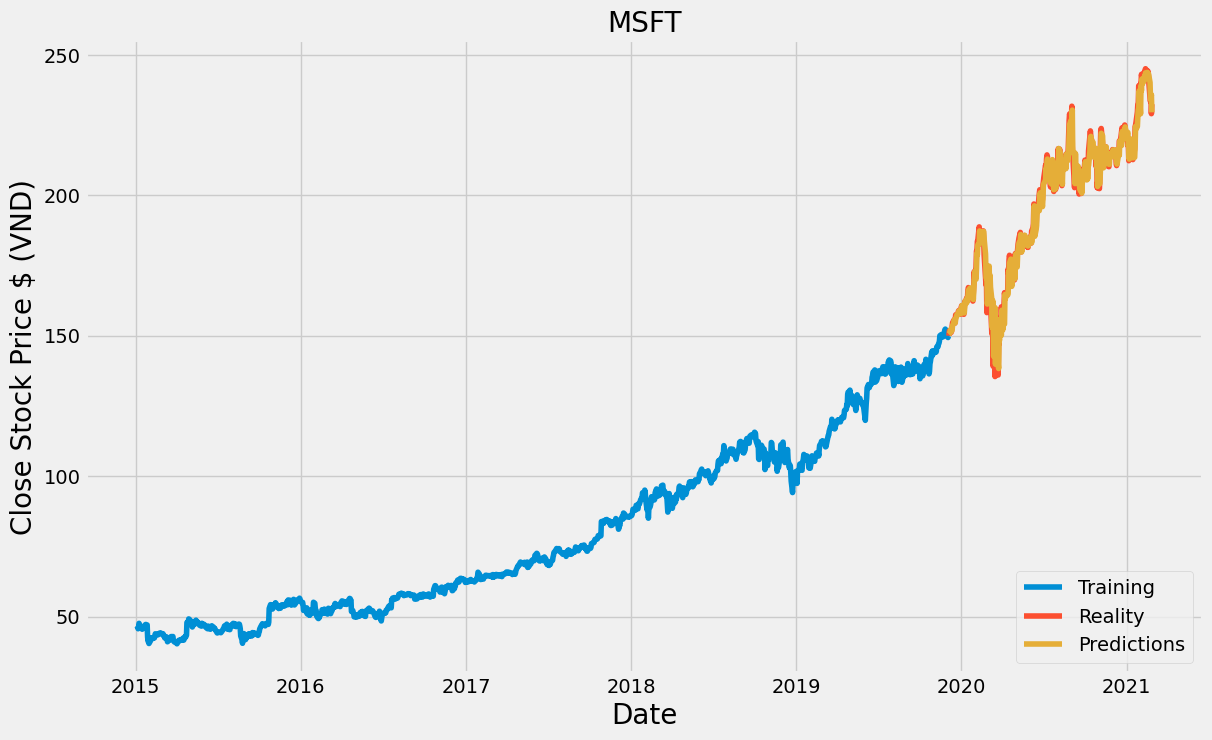

In [24]:
#vẽ biểu đồ để biễu diễn dự đoán 
#chia tệp data thành tập train và reality sau đó xây dựng tệp predictions để so sánh 
training = stock_close_data[:trainingDataLength]
reality= stock_close_data[trainingDataLength:]
reality['Predictions'] = predictions

root = tkinter.Tk()
fig = mtlplt.figure(figsize=(20,10))
mtlplt.title('MSFT')
mtlplt.xlabel('Date', fontsize=20)
mtlplt.ylabel('Close Stock Price $ (VND)', fontsize=20)
mtlplt.plot(training['Close'])
mtlplt.plot(reality[['Close', 'Predictions']])
mtlplt.legend(['Training', 'Reality', 'Predictions'], loc='lower right')
canvas = FigureCanvasTkAgg(fig, master=root) 
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

root.geometry('1400x900')
root.mainloop()

In [25]:
#Show dữ liệu Close và Predictions
reality

,Close,Predictions
Date,,
2019-12-05,149.93,150.448456
2019-12-06,151.75,150.599808
2019-12-09,151.36,152.221237
2019-12-10,151.13,151.894516
2019-12-11,151.70,151.598846
...,...,...
2021-02-22,234.51,240.086151
2021-02-23,233.27,234.108978
2021-02-24,234.55,234.364700


In [28]:
#In kết quả của giá đóng và giá dự đoán ra file csv
reality.to_csv('MS.csv')

In [29]:
mae = np.mean(np.abs(Ytest - predictions ))
print(mae)
rmse = np.sqrt(np.mean((Ytest - predictions) ** 2))
print(rmse)
#tính độ chính xác của dự báo
mape = np.mean(np.abs((Ytest - predictions )/ Ytest)) *100
print(mape)

3.2326215765005557
4.537994070748588
1.72379519312849
